In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Sachin\Downloads\archive (1)\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
X = df[['Annual Income (k$)' , 'Spending Score (1-100)']]

In [8]:
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters = k , init = 'k-means++' , random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518778,
 24766.471609793443,
 23103.122085983916]

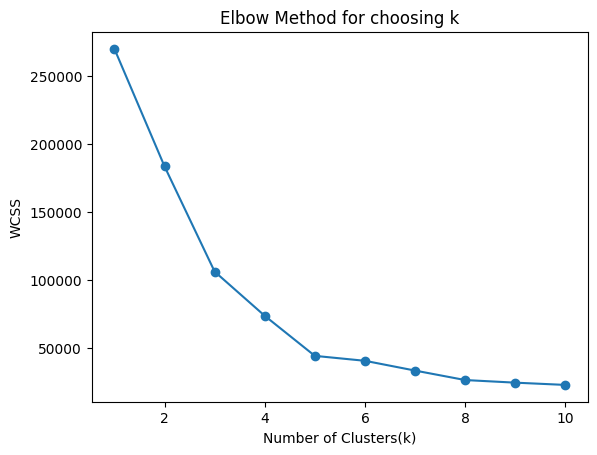

In [11]:
plt.plot(range(1,11),wcss,marker = 'o')
plt.title("Elbow Method for choosing k")
plt.xlabel("Number of Clusters(k)")
plt.ylabel("WCSS")
plt.show()

In [12]:
# Apply K-Means with optimal clusters (k=5)
k_optimal = 5
kmeans_optimal = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
cluster_labels = kmeans_optimal.fit_predict(X)

# Add cluster labels to dataframe
df['Cluster'] = cluster_labels
print("Cluster distribution:")
print(df['Cluster'].value_counts().sort_index())

Cluster distribution:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


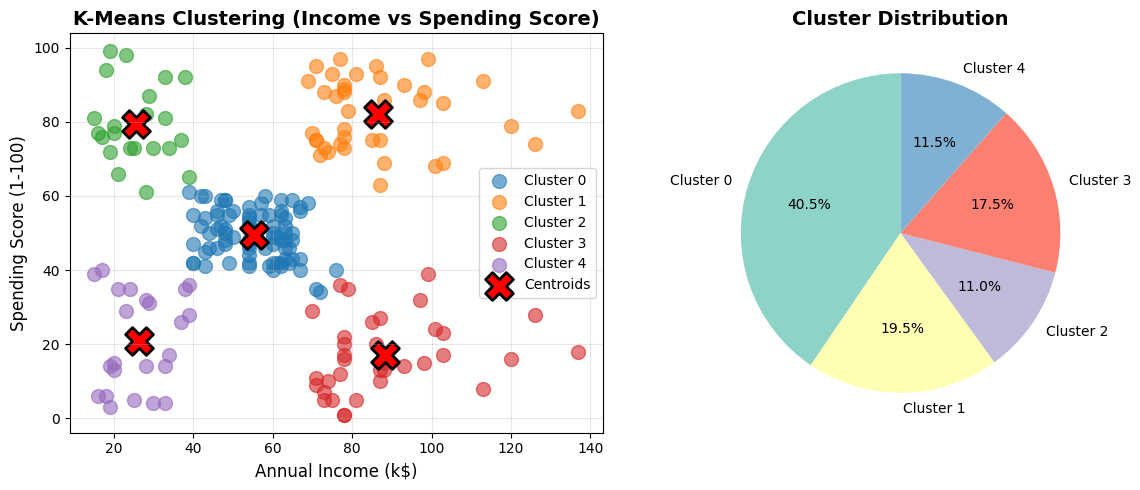


Cluster Centers (Centroids):
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


In [13]:
# 2D Scatter Plot of Clusters
plt.figure(figsize=(12, 5))

# Plot 1: All points colored by cluster
plt.subplot(1, 2, 1)
for i in range(k_optimal):
    cluster_points = X[cluster_labels == i]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
                label=f'Cluster {i}', s=100, alpha=0.6)

# Plot cluster centers
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            c='red', marker='X', s=400, label='Centroids', edgecolors='black', linewidths=2)

plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('K-Means Clustering (Income vs Spending Score)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Cluster distribution pie chart
plt.subplot(1, 2, 2)
cluster_counts = df['Cluster'].value_counts().sort_index()
colors = plt.cm.Set3(range(k_optimal))
plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in range(k_optimal)], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Cluster Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nCluster Centers (Centroids):")
centroids_df = pd.DataFrame(kmeans_optimal.cluster_centers_, 
                            columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(centroids_df)


Silhouette Score: 0.5539


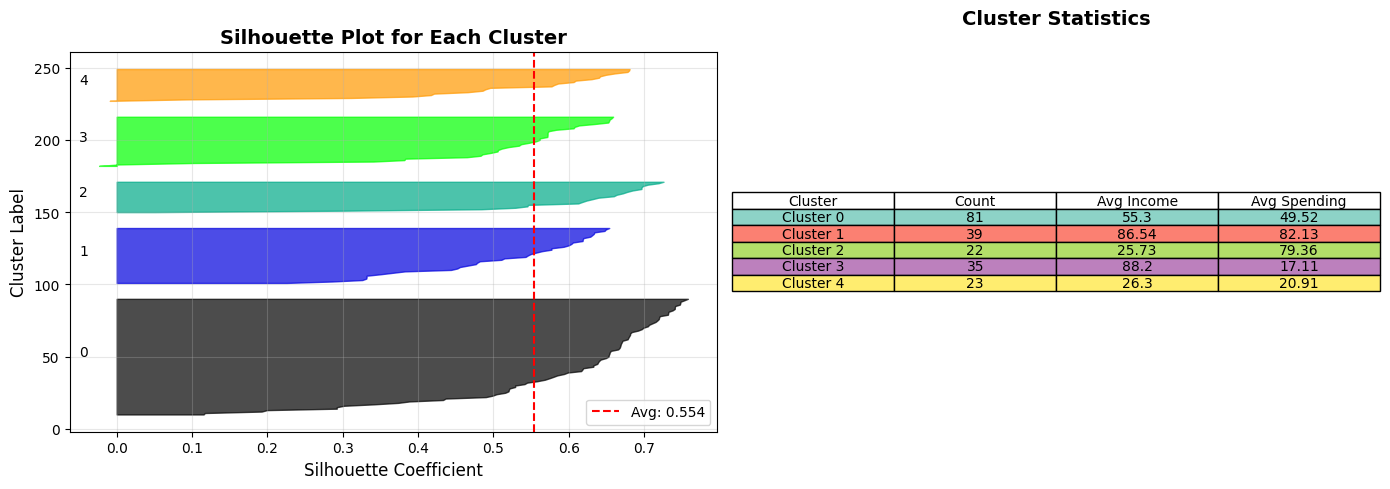


Detailed Cluster Statistics:
     Cluster  Count  Avg Income  Avg Spending
0  Cluster 0     81       55.30         49.52
1  Cluster 1     39       86.54         82.13
2  Cluster 2     22       25.73         79.36
3  Cluster 3     35       88.20         17.11
4  Cluster 4     23       26.30         20.91


In [14]:
# Silhouette Analysis
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg = silhouette_score(X, cluster_labels)
print(f"\nSilhouette Score: {silhouette_avg:.4f}")

# Create silhouette plot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
y_lower = 10
silhouette_vals = silhouette_samples(X, cluster_labels)

for i in range(k_optimal):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / k_optimal)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Avg: {silhouette_avg:.3f}')
plt.xlabel('Silhouette Coefficient', fontsize=12)
plt.ylabel('Cluster Label', fontsize=12)
plt.title('Silhouette Plot for Each Cluster', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Cluster statistics
plt.subplot(1, 2, 2)
cluster_stats = []
for i in range(k_optimal):
    cluster_data = X[cluster_labels == i]
    cluster_stats.append({
        'Cluster': f'Cluster {i}',
        'Count': len(cluster_data),
        'Avg Income': cluster_data.iloc[:, 0].mean(),
        'Avg Spending': cluster_data.iloc[:, 1].mean()
    })

stats_df = pd.DataFrame(cluster_stats)
plt.axis('off')
colors_table = plt.cm.Set3(np.linspace(0, 1, k_optimal))
plt.table(cellText=stats_df.round(2).values,
          colLabels=stats_df.columns,
          cellLoc='center',
          loc='center',
          cellColours=[[colors_table[i]] * len(stats_df.columns) for i in range(k_optimal)])
plt.title('Cluster Statistics', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\nDetailed Cluster Statistics:")
print(stats_df.round(2))

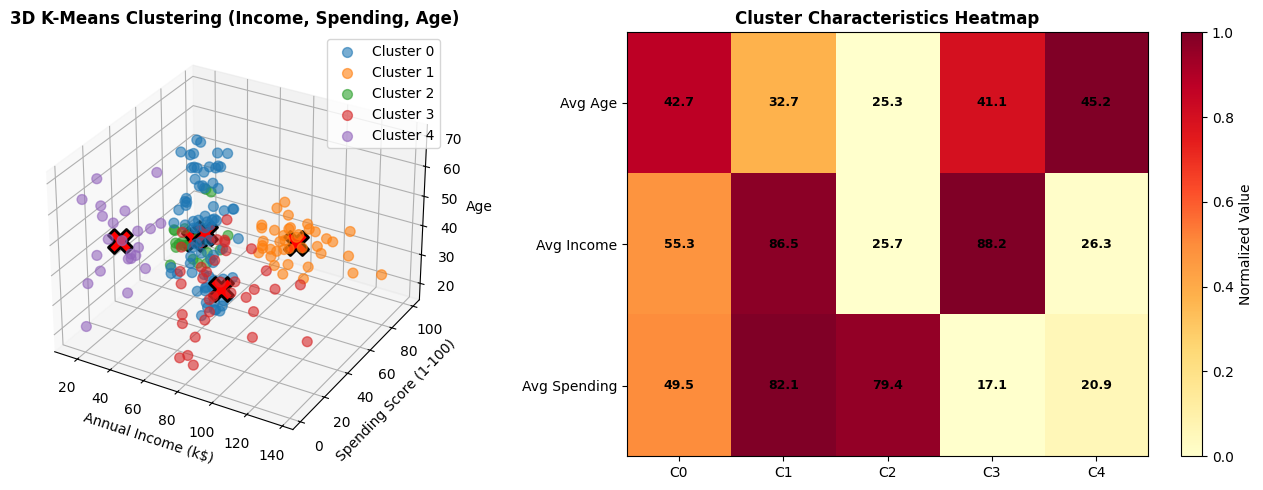

In [15]:
# 3D Scatter Plot using Age as third dimension
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
colors_3d = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i in range(k_optimal):
    cluster_points = df[df['Cluster'] == i]
    ax1.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'],
               cluster_points['Age'], c=colors_3d[i], label=f'Cluster {i}', s=50, alpha=0.6)

for i in range(k_optimal):
    cluster_data = df[df['Cluster'] == i]
    ax1.scatter(kmeans_optimal.cluster_centers_[i, 0], kmeans_optimal.cluster_centers_[i, 1],
               cluster_data['Age'].mean(), c='red', marker='X', s=300, edgecolors='black', linewidths=2)

ax1.set_xlabel('Annual Income (k$)', fontsize=10)
ax1.set_ylabel('Spending Score (1-100)', fontsize=10)
ax1.set_zlabel('Age', fontsize=10)
ax1.set_title('3D K-Means Clustering (Income, Spending, Age)', fontsize=12, fontweight='bold')
ax1.legend()

# Cluster Characteristics Heatmap
ax2 = fig.add_subplot(1, 2, 2)
cluster_char = []
for i in range(k_optimal):
    cluster_data = df[df['Cluster'] == i]
    cluster_char.append([cluster_data['Age'].mean(), cluster_data['Annual Income (k$)'].mean(),
                        cluster_data['Spending Score (1-100)'].mean()])

cluster_char_array = np.array(cluster_char)
cluster_char_normalized = (cluster_char_array - cluster_char_array.min(axis=0)) / (cluster_char_array.max(axis=0) - cluster_char_array.min(axis=0))

im = ax2.imshow(cluster_char_normalized.T, cmap='YlOrRd', aspect='auto')
ax2.set_xticks(range(k_optimal))
ax2.set_xticklabels([f'C{i}' for i in range(k_optimal)])
ax2.set_yticks([0, 1, 2])
ax2.set_yticklabels(['Avg Age', 'Avg Income', 'Avg Spending'])
ax2.set_title('Cluster Characteristics Heatmap', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=ax2, label='Normalized Value')

for i in range(k_optimal):
    for j in range(3):
        ax2.text(i, j, f'{cluster_char[i][j]:.1f}', ha='center', va='center', color='black', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [16]:
# Analysis Summary
print('='*80)
print('K-MEANS CLUSTERING ANALYSIS - SUMMARY')
print('='*80)
print(f'\nOptimal Clusters: {k_optimal}')
print(f'Total Customers: {len(df)}')
print(f'Silhouette Score: {silhouette_avg:.4f}')
print(f'Total WCSS: {kmeans_optimal.inertia_:.2f}')
print('\n' + '='*80)
print('CLUSTER ANALYSIS')
print('='*80)

for i in range(k_optimal):
    cluster_data = df[df['Cluster'] == i]
    pct = len(cluster_data)/len(df)*100
    print(f'\nCluster {i} ({pct:.1f}% - {len(cluster_data)} customers):')
    print(f'  Income: ${kmeans_optimal.cluster_centers_[i, 0]:.0f}k')
    print(f'  Spending Score: {kmeans_optimal.cluster_centers_[i, 1]:.0f}/100')
    print(f'  Avg Age: {cluster_data["Age"].mean():.0f} years')

print('\n' + '='*80)
print('CLUSTERING COMPLETE! All visualizations have been generated.')
print('='*80)

K-MEANS CLUSTERING ANALYSIS - SUMMARY

Optimal Clusters: 5
Total Customers: 200
Silhouette Score: 0.5539
Total WCSS: 44448.46

CLUSTER ANALYSIS

Cluster 0 (40.5% - 81 customers):
  Income: $55k
  Spending Score: 50/100
  Avg Age: 43 years

Cluster 1 (19.5% - 39 customers):
  Income: $87k
  Spending Score: 82/100
  Avg Age: 33 years

Cluster 2 (11.0% - 22 customers):
  Income: $26k
  Spending Score: 79/100
  Avg Age: 25 years

Cluster 3 (17.5% - 35 customers):
  Income: $88k
  Spending Score: 17/100
  Avg Age: 41 years

Cluster 4 (11.5% - 23 customers):
  Income: $26k
  Spending Score: 21/100
  Avg Age: 45 years

CLUSTERING COMPLETE! All visualizations have been generated.
